In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day36-imputing-numerical-data/titanic_toy.csv")

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
X = df.drop(columns = "Survived")
y = df['Survived']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [8]:
X_train['Age_99'] = X_train['Age'].fillna((99))
X_train['Age_minus1'] = X_train['Age'].fillna((-1))

X_train['Fare_99'] = X_train['Fare'].fillna(99)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

X_train.sample(5)

C:\Users\baibh\AppData\Local\Temp/ipykernel_12824/1922349942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_99'] = X_train['Age'].fillna((99))
C:\Users\baibh\AppData\Local\Temp/ipykernel_12824/1922349942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_minus1'] = X_train['Age'].fillna((-1))
C:\Users\baibh\AppData\Local\Temp/ipykernel_12824/1922349942.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1
395,22.0,7.7958,0,22.0,22.0,7.7958,7.7958
297,2.0,151.5500,3,2.0,2.0,151.5500,151.5500
383,35.0,52.0000,1,35.0,35.0,52.0000,52.0000
165,9.0,20.5250,2,9.0,9.0,20.5250,20.5250
36,NaN,7.2292,0,99.0,-1.0,7.2292,7.2292


In [9]:
print('The original Age Variance is' , X_train['Age'].var())
print('The 99 Age Variance is', X_train['Age_99'].var())
print('The minus -1 Age Variance is', X_train['Age_minus1'].var())

print('The original Fare Variance is' , X_train['Fare'].var())
print('The 99 Fare Variance is', X_train['Fare_99'].var())
print('The minus -1 Fare Variance is', X_train['Fare_minus1'].var())

The original Age Variance is 204.3495133904614
The 99 Age Variance is 951.7275570187172
The minus -1 Age Variance is 318.0896202624484
The original Fare Variance is 2448.197913706318
The 99 Fare Variance is 2536.0773428319685
The minus -1 Fare Variance is 2378.5676784883503


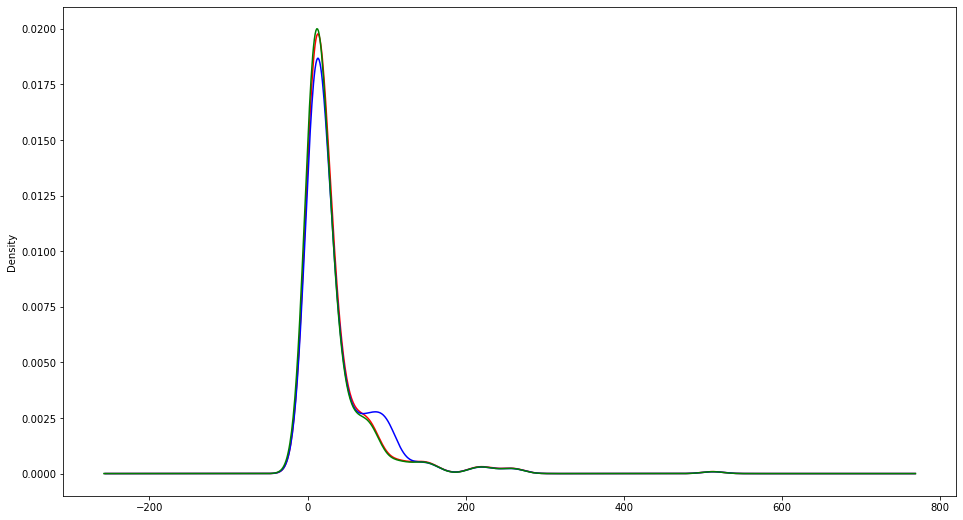

In [15]:
fig = plt.figure(figsize= (16, 9))
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind = 'kde', ax = ax, color = 'red')
X_train['Fare_99'].plot(kind = 'kde', ax = ax, color = 'blue')
X_train['Fare_minus1'].plot(kind = 'kde', ax = ax, color = 'green')

plt.show()


In [16]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,73.268412,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,16.051452,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-100.878826,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,128.692715,114.394141
Fare_99,73.268412,2448.197914,16.051452,-100.878826,128.692715,2536.077343,2216.958409
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,2216.958409,2378.567678


In [17]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.095527,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.192723,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.064933,-0.062687
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.143284,0.131514
Fare_99,0.095527,1.000000,0.192723,-0.064933,0.143284,1.000000,0.902648
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.902648,1.000000


# Using Scikit Learn

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [20]:
imputer1 = SimpleImputer(strategy = 'constant', fill_value = 99)
imputer2 = SimpleImputer(strategy = 'constant', fill_value = 999)

In [29]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])], remainder = 'passthrough')

In [30]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [31]:
transformed = trf.transform(X_train)

In [33]:
X_train_df = pd.DataFrame(transformed, columns = X_train.columns)

In [34]:
X_train_df.sample(5)

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1
161,40.5,7.7500,0.0,40.5,40.5,7.7500,7.7500
194,22.0,7.2292,0.0,22.0,22.0,7.2292,7.2292
619,99.0,69.5500,10.0,99.0,-1.0,69.5500,69.5500
322,25.0,13.0000,0.0,25.0,25.0,13.0000,13.0000
621,25.0,7.0500,0.0,25.0,25.0,7.0500,7.0500
